# Tutorial

This notebook demonstrates how to use the data contained in this directory to reproduce the plots in the accompanying paper "Constraints on the early Universe star formation efficiency from galaxy clustering and halo modeling of Halpha and [OIII] emitters"

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii
from astropy.table import Table

## Plot the clustering measurements and best fit functions

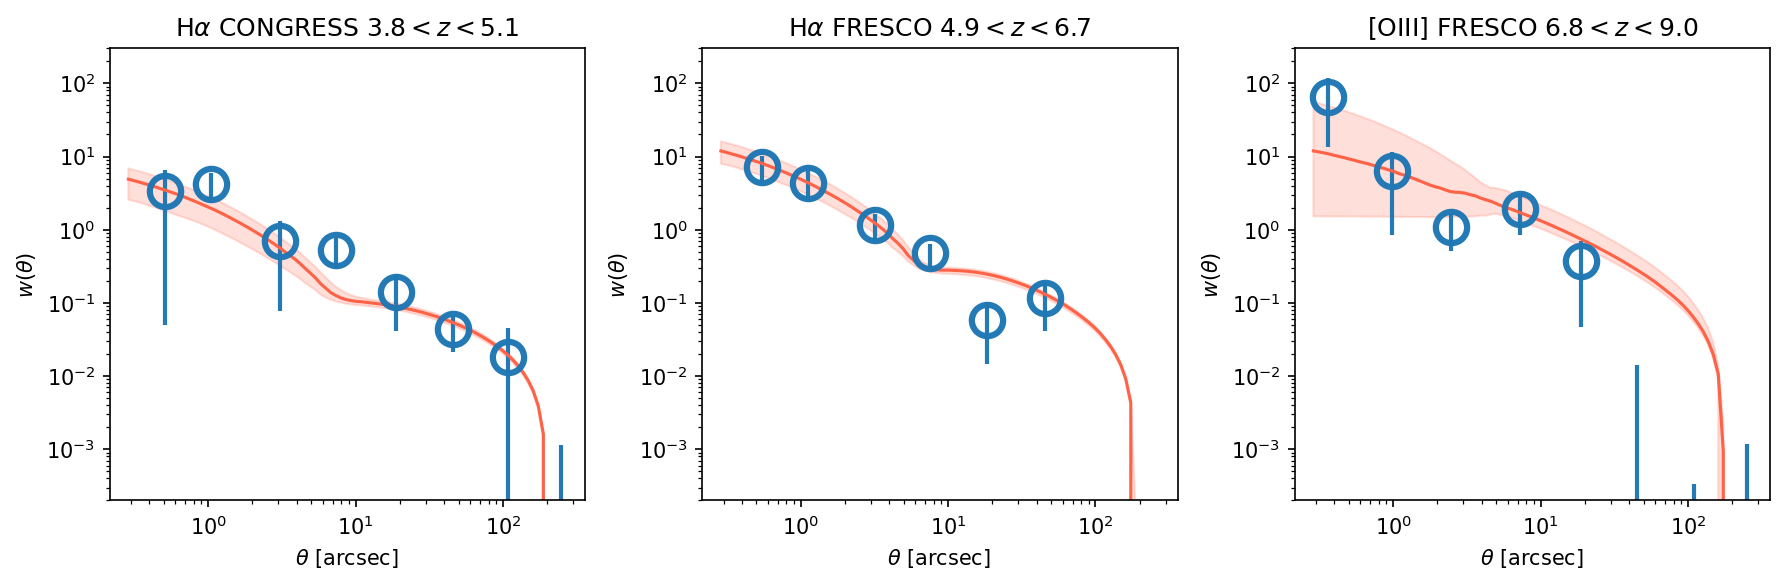

In [44]:
# Load data
wth_meas_bin1 = ascii.read('w-theta_measurements_ha-z4.3.ecsv')
wth_meas_bin2 = ascii.read('w-theta_measurements_ha-z5.4.ecsv')
wth_meas_bin3 = ascii.read('w-theta_measurements_oiii-z7.3.ecsv')

wth_model_bin1 = ascii.read('w-theta_best-fit-model_ha-z4.3.ecsv')
wth_model_bin2 = ascii.read('w-theta_best-fit-model_ha-z5.4.ecsv')
wth_model_bin3 = ascii.read('w-theta_best-fit-model_oiii-z7.3.ecsv')


# Do plotting
fig, ax = plt.subplots(1,3, figsize=(12.,4), dpi=150)
ax = ax.ravel()


ax[0].set_title('H$\\alpha$ CONGRESS $3.8<z<5.1$', fontsize=12)

# measurements
ax[0].errorbar(wth_meas_bin1['theta'], wth_meas_bin1['w'], wth_meas_bin1['w_err'], fmt='o', lw=2, ms = 15, 
capsize=0, alpha=0.98, markeredgewidth=3, markerfacecolor='none')
# model
ax[0].fill_between(wth_model_bin1['theta'], y1=wth_model_bin1['w_16'], y2=wth_model_bin1['w_84'], alpha=0.2, color='tomato')
ax[0].plot(wth_model_bin1['theta'], wth_model_bin1['w_50'], color='tomato')

ax[1].set_title('H$\\alpha$ FRESCO $4.9<z<6.7$', fontsize=12)
# measurements
ax[1].errorbar(wth_meas_bin2['theta'], wth_meas_bin2['w'], wth_meas_bin2['w_err'], fmt='o', lw=2, ms = 15, capsize=0, alpha=0.98, markeredgewidth=3, markerfacecolor='none')
# model
ax[1].fill_between(wth_model_bin2['theta'], y1=wth_model_bin2['w_16'], y2=wth_model_bin2['w_84'], alpha=0.2, color='tomato')
ax[1].plot(wth_model_bin2['theta'], wth_model_bin2['w_50'], color='tomato')


ax[2].set_title('[OIII] FRESCO $6.8<z<9.0$', fontsize=12)
# measurements
ax[2].errorbar(wth_meas_bin3['theta'], wth_meas_bin3['w'], wth_meas_bin3['w_err'], fmt='o', lw=2, ms = 15, capsize=0, alpha=0.98, markeredgewidth=3, markerfacecolor='none')
# model
ax[2].fill_between(wth_model_bin3['theta'], y1=wth_model_bin3['w_16'], y2=wth_model_bin3['w_84'], alpha=0.2, color='tomato')
ax[2].plot(wth_model_bin3['theta'], wth_model_bin3['w_50'], color='tomato')


for i in [0,1,2]:    
    ax[i].set_xlabel(r'$\theta$ [arcsec] ')
    ax[i].set_ylabel(r'$w(\theta)$')
    ax[i].set_xscale('log')
    ax[i].set_yscale('log')
    ax[i].set_ylim(0.0002, 300)
    ax[i].set_xlim(6e-5*3600, 0.1*3600)
    ax[i].minorticks_on()



plt.tight_layout()
plt.show()




## UVLF best fit models and high redshift predictions

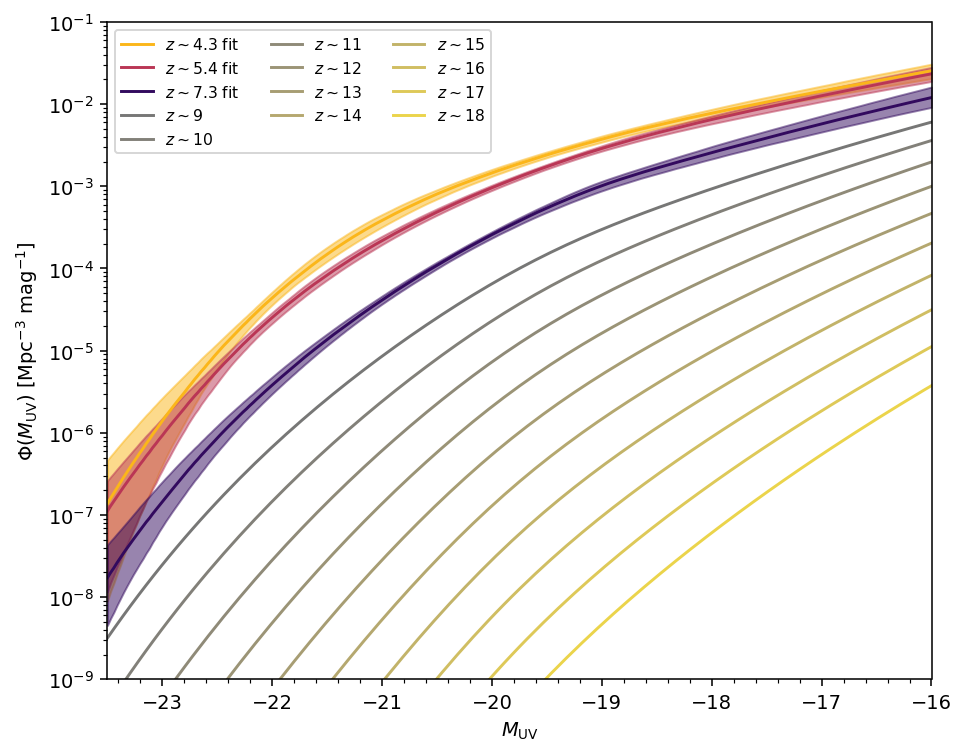

In [43]:
uvlf_bin1 = ascii.read('UVLF_best-fit-model_z4.3.ecsv')
uvlf_bin2 = ascii.read('UVLF_best-fit-model_z5.4.ecsv')
uvlf_bin3 = ascii.read('UVLF_best-fit-model_z7.3.ecsv')

plt.figure(dpi=140, figsize=(7,5.5))

plt.plot(uvlf_bin1['MUV'], uvlf_bin1['Phi_50'], color=plt.cm.inferno_r((0+0.5)/3), label='$z\sim 4.3$ fit')
plt.fill_between(uvlf_bin1['MUV'], y1=uvlf_bin1['Phi_16'], y2=uvlf_bin1['Phi_84'], color=plt.cm.inferno_r((0+0.5)/3), alpha=0.5)

plt.plot(uvlf_bin2['MUV'], uvlf_bin2['Phi_50'], color=plt.cm.inferno_r((1+0.5)/3), label='$z\sim 5.4$ fit')
plt.fill_between(uvlf_bin2['MUV'], y1=uvlf_bin2['Phi_16'], y2=uvlf_bin2['Phi_84'], color=plt.cm.inferno_r((1+0.5)/3), alpha=0.5)

plt.plot(uvlf_bin3['MUV'], uvlf_bin3['Phi_50'], color=plt.cm.inferno_r((2+0.5)/3), label="$z\sim7.3$ fit")
plt.fill_between(uvlf_bin3['MUV'], y1=uvlf_bin3['Phi_16'], y2=uvlf_bin3['Phi_84'], color=plt.cm.inferno_r((2+0.5)/3), alpha=0.5)

## plot model predictions for z>9
for i in range(9,19):
    uvlf_pred = ascii.read(f'UVLF_prediction_z{i}.ecsv')
    plt.plot(uvlf_pred['MUV'], uvlf_pred['Phi_fiducial'], color=plt.cm.cividis((i+0.5)/20), label=f"$z\sim{i}$")

plt.xlabel(r'$M_{\rm UV}$')    
plt.ylabel(r'$\Phi(M_{\rm UV})$ [Mpc$^{-3}$ mag$^{-1}$]')
plt.xlim(-23.5,-16.0)
plt.ylim(1e-9, 0.1)
plt.yscale('log')
plt.legend(ncol=3,fontsize=8)
plt.minorticks_on()

plt.tight_layout()


## MUV vs. Mhalo relation

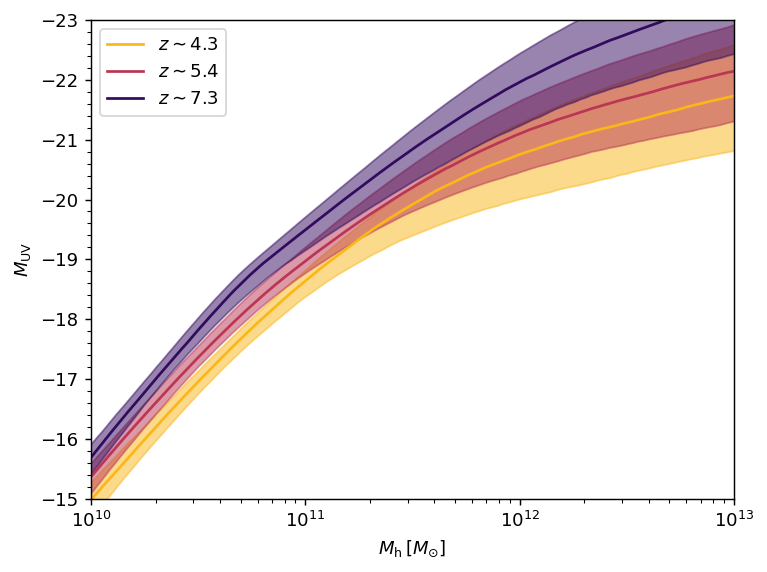

In [51]:
muv_mh_bin1 = ascii.read('MUV-vs-Mhalo_z4.3.ecsv')
muv_mh_bin2 = ascii.read('MUV-vs-Mhalo_z5.4.ecsv')
muv_mh_bin3 = ascii.read('MUV-vs-Mhalo_z7.3.ecsv')

plt.figure(dpi=130, figsize=(6,4.5))

plt.plot(muv_mh_bin1['Mhalo'], muv_mh_bin1['MUV_50'], color=plt.cm.inferno_r((0+0.5)/3), label='$z\sim4.3$')
plt.fill_between(muv_mh_bin1['Mhalo'], y1=muv_mh_bin1['MUV_16'], y2=muv_mh_bin1['MUV_84'], color=plt.cm.inferno_r((0+0.5)/3), alpha=0.5)

plt.plot(muv_mh_bin2['Mhalo'], muv_mh_bin2['MUV_50'], color=plt.cm.inferno_r((1+0.5)/3), label='$z\sim5.4$')
plt.fill_between(muv_mh_bin2['Mhalo'], y1=muv_mh_bin2['MUV_16'], y2=muv_mh_bin2['MUV_84'], color=plt.cm.inferno_r((1+0.5)/3), alpha=0.5)

plt.plot(muv_mh_bin3['Mhalo'], muv_mh_bin3['MUV_50'], color=plt.cm.inferno_r((2+0.5)/3), label='$z\sim7.3$')
plt.fill_between(muv_mh_bin3['Mhalo'], y1=muv_mh_bin3['MUV_16'], y2=muv_mh_bin3['MUV_84'], color=plt.cm.inferno_r((2+0.5)/3), alpha=0.5)

plt.ylabel(r'$M_{\rm UV}$')
plt.xlabel(r'$M_{\rm h} \, [M_{\odot}]$')
plt.ylim(-15, -23)    
plt.xlim(1e10,1e13)
plt.xscale('log')
plt.legend(fontsize=10)
plt.minorticks_on()

plt.tight_layout()
plt.show()



## SFE vs Mhalo

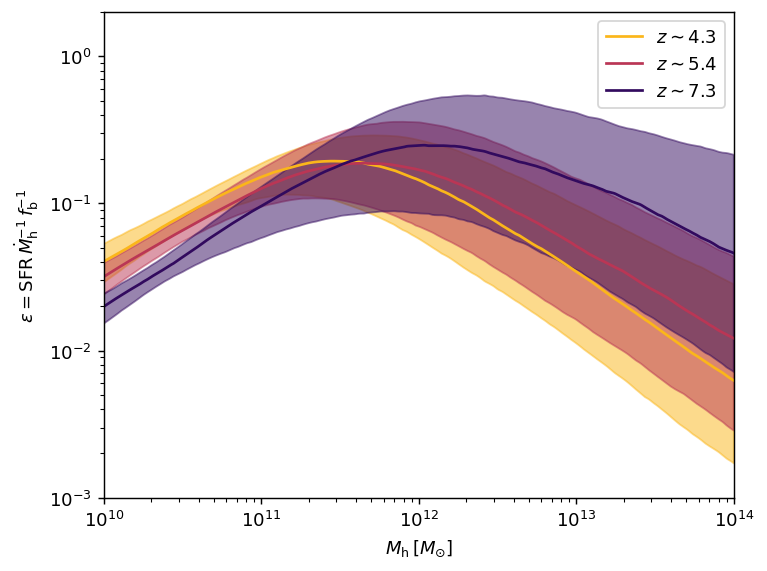

In [60]:
sfe_mh_bin1 = ascii.read('SFE-vs-Mhalo_z4.3.ecsv')
sfe_mh_bin2 = ascii.read('SFE-vs-Mhalo_z5.4.ecsv')
sfe_mh_bin3 = ascii.read('SFE-vs-Mhalo_z7.3.ecsv')

plt.figure(dpi=130, figsize=(6,4.5))

plt.plot(sfe_mh_bin1['Mhalo'], sfe_mh_bin1['sfe_50'], color=plt.cm.inferno_r((0+0.5)/3), label='$z\sim4.3$')
plt.fill_between(sfe_mh_bin1['Mhalo'], y1=sfe_mh_bin1['sfe_16'], y2=sfe_mh_bin1['sfe_84'], color=plt.cm.inferno_r((0+0.5)/3), alpha=0.5)

plt.plot(sfe_mh_bin2['Mhalo'], sfe_mh_bin2['sfe_50'], color=plt.cm.inferno_r((1+0.5)/3), label='$z\sim5.4$')
plt.fill_between(sfe_mh_bin2['Mhalo'], y1=sfe_mh_bin2['sfe_16'], y2=sfe_mh_bin2['sfe_84'], color=plt.cm.inferno_r((1+0.5)/3), alpha=0.5)

plt.plot(sfe_mh_bin3['Mhalo'], sfe_mh_bin3['sfe_50'], color=plt.cm.inferno_r((2+0.5)/3), label='$z\sim7.3$')
plt.fill_between(sfe_mh_bin3['Mhalo'], y1=sfe_mh_bin3['sfe_16'], y2=sfe_mh_bin3['sfe_84'], color=plt.cm.inferno_r((2+0.5)/3), alpha=0.5)

plt.xlim(1e10, 1.e14)
plt.ylim(0.001, 2)
plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\epsilon = {\rm SFR} \, \dot{M}_{\rm h}^{-1} \, f_{\rm b}^{-1}$')
plt.xlabel(r'$M_{\rm h} \, [M_{\odot}]$')
plt.legend(fontsize=10)
plt.minorticks_on()

plt.tight_layout()
plt.show()



## Galaxy bias

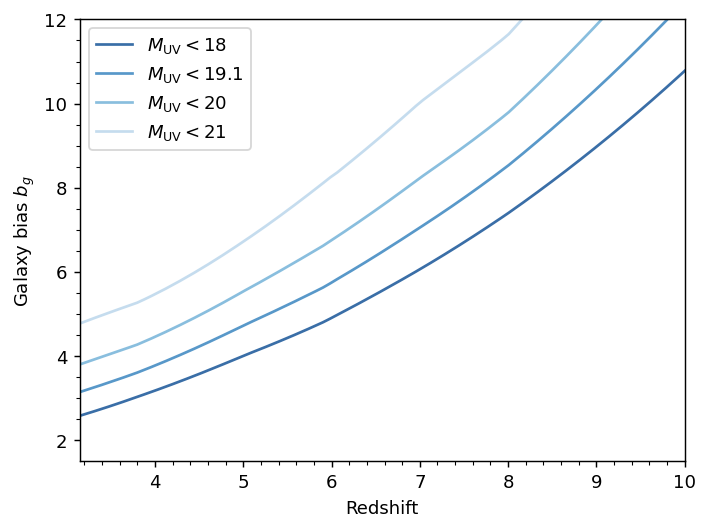

In [68]:
bias = ascii.read('Galaxy-bias_vs_z.ecsv')

plt.figure(dpi=130, figsize=(6,4.5))

plt.plot(bias['Redshift'], bias['Bias_MUV-18'], lw=1.5, alpha=0.8, color=plt.cm.Blues_r((0 + 0.5)/5), label=r'$M_{\rm UV} < 18$')
plt.plot(bias['Redshift'], bias['Bias_MUV-19.1'], lw=1.5, alpha=0.8, color=plt.cm.Blues_r((1 + 0.5)/5), label=r'$M_{\rm UV} < 19.1$')
plt.plot(bias['Redshift'], bias['Bias_MUV-20'], lw=1.5, alpha=0.8, color=plt.cm.Blues_r((2 + 0.5)/5), label=r'$M_{\rm UV} < 20$')
plt.plot(bias['Redshift'], bias['Bias_MUV-21'], lw=1.5, alpha=0.8, color=plt.cm.Blues_r((3 + 0.5)/5), label=r'$M_{\rm UV} < 21$')

plt.ylabel('Galaxy bias $b_g$')
plt.ylim(1.5, 12)
plt.legend(fontsize=10)
plt.xlabel(r'Redshift')    
plt.xlim(3.15,10.)
plt.minorticks_on()
plt.show()
